In [22]:
%matplotlib inline
import numpy as np
from matplotlib import rc
import deepdish as dd

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 20}

rc('font', **font)
#rc('text',usetex=True)
import matplotlib.pyplot as plt
import h5py

In [23]:
all_n = np.arange(-10, 2.5 ,0.5) # we cut off n = 2.5, 3, 3.5, 4 because Cloudy

def get_index_number(n, z = None, z_index = None):

    all_n = np.arange(-10, 2.5 , 0.5) # we cut off n = 2.5, 3, 3.5, 4 because Cloudy
    all_n = np.arange(-10, 4.0 , 0.5)

    all_z = np.array([0.0000e+00, 1.2202e-01, 2.5893e-01, 4.1254e-01, 5.8489e-01, 7.7828e-01, 9.9526e-01, 1.2387e+00,
             1.5119e+00, 1.8184e+00, 2.1623e+00, 2.5481e+00, 2.9811e+00, 3.4668e+00, 4.0119e+00, 4.6234e+00,
             5.3096e+00, 6.0795e+00, 6.9433e+00, 7.9125e+00, 9.0000e+00, 1.0220e+01, 1.1589e+01, 1.3125e+01,
             1.4849e+01])

    
    index1 = np.argmin( np.abs(all_n - n))
    
    if z_index is None and z is None:
        index2 = 0 # redshift zero
    elif z_index is None:
        index2 = np.argmin( np.abs(all_z - z))
    elif z is None:
        if z_index < 0:
            z_index = np.size(all_z) + z_index
            
        index2 = z_index
    else:
        print "Cannot provide both a redshift value and redshift bin value"
        raise ValueError
        
    
    run_num = (index1)*len(all_z) + (index2 + 1)
    
    return index1, index2, run_num
    

#j = 0
#for i in np.arange(1, 626,1):
#    
#    n_z_list[i-1] = (all_n[j], all_z[(i-1) % (np.size(all_z))])
    
#    j = j + 1
#    if j >= np.size(all_n):
#        j = 0
        
#n_z_dict = {}
#
#i = 1
#for t in n_z_list:
#    n_z_dict[t] = i
#    i = i + 1
    
#i = 1
#n_z_dict_2 = {}
#for t in n_z_list:
#    n_z_dict_2[(t[0], (i-1)%(np.size(all_z)))] = i
#    i = i + 1

In [24]:
data_type = 'thin'

if data_type == 'thin':
    data = h5py.File('./CloudyData_UVB=HM2012.h5')
elif data_type == 'shielded':
    data = h5py.File('./CloudyData_UVB=HM2012_shielded.h5')
elif data_type == 'shielded_cooling_only':
    data = dd.io.load('./CloudyData_UVB=HM2012_shielded_cooling_only.h5')
elif data_type == 'noUVB':
    data = dd.io.load('./CloudyData_noUVB.h5')
    
#data = h5py.File('./CloudyData_UVB=HM2012_shielded_cooling_only.h5')
#data = dd.io.load('./CloudyData_UVB=HM2012_shielded.h5')
#data = h5py.File('CloudyData_UVB=HM2012.h5')
#data = h5py.File('CloudyData_noUVB.h5')

In [25]:


n = -2
Z = 0.01


In [26]:
metal_cool = data['CoolingRates']['Metals']['Cooling']

try:
    metal_heat = data['CoolingRates']['Metals']['Heating']
except:
    print 'failed to load heating'

prim_cool  = data['CoolingRates']['Primordial']['Cooling']
try:
    prim_heat  = data['CoolingRates']['Primordial']['Heating']
except:
    print 'failed to load heating'

In [27]:
#print T

In [28]:
#
#
# Choose your n and z here
#
#
plot_n  = [-2, 0, 2]
z       = None
z_index = -1

-2 None -1
0 None -1
2 None -1


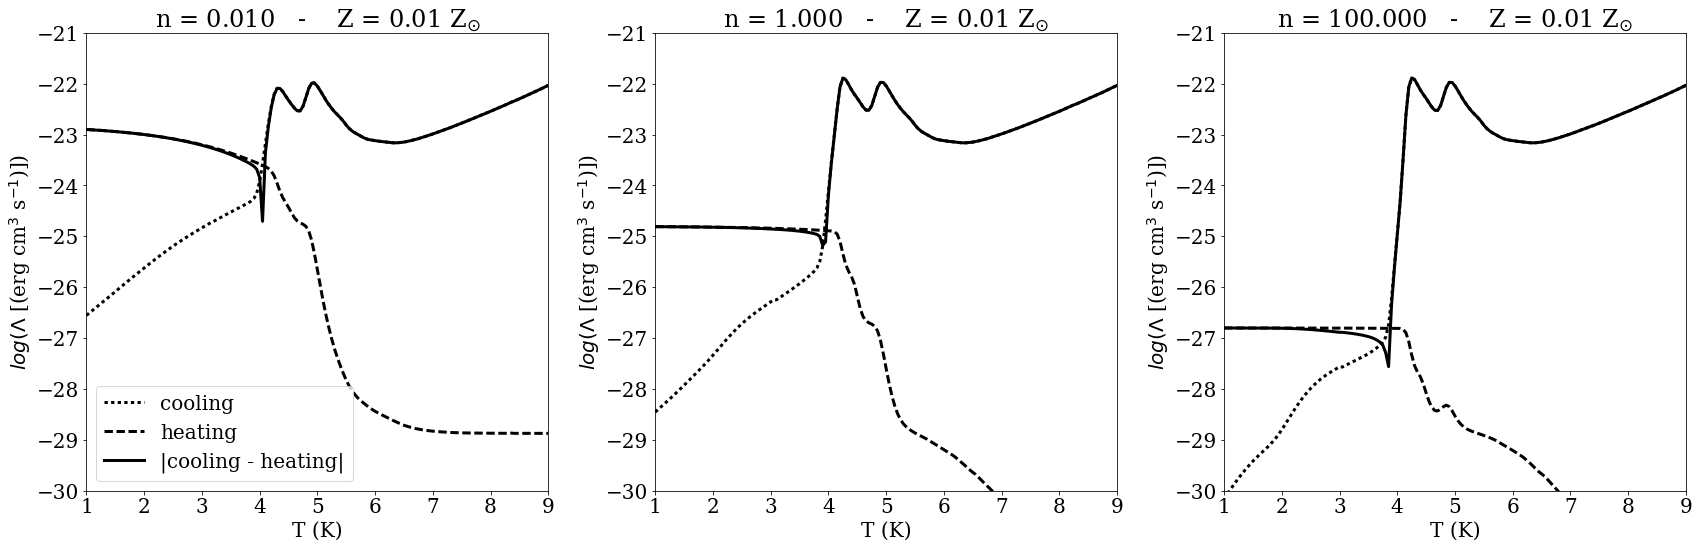

In [29]:

T = np.logspace(1,9,161)
T = np.log10(T)

fig, ax = plt.subplots(1,3)

for i in [0,1,2]:
    
    n = plot_n[i]
    
    
    print n, z, z_index
    index1, index2, run_num = get_index_number(n, z = z, z_index = z_index)
    
    try:
        index2 = 0  
    
        total_cool = metal_cool[index1][index2] * Z + prim_cool[index1][index2]
        #print prim_cool[index1][index2]
        total_heat = metal_heat[index1][index2] * Z + prim_heat[index1][index2]
        net = total_cool - total_heat
    except:
        total_cool = metal_cool[index1] * Z + prim_cool[index1]
        print 'failed to compute heating and net '

    
    ax[i].plot(T, np.log10(total_cool), lw = 3, color = 'black', ls = ':', label = 'cooling')
    
    try:
        ax[i].plot(T, np.log10(total_heat), lw = 3, color = 'black', ls = '--', label = 'heating')
    except:
        print 'failed to plot heating'
        
    try:
        ax[i].plot(T, np.log10(np.abs(net)), lw = 3, color = 'black', ls = '-', label = '|cooling - heating|')
    except:
        print 'failed to plot cooling - heating'
        
    if i == 0:
        ax[i].legend(loc='best')
    ax[i].set_xlabel('T (K)')
    ax[i].set_ylabel(r'$log(\Lambda$ [(erg cm$^{3}$ s$^{-1}$)])')
    
    ax[i].set_title(r'n = %.3f   -    Z = %0.2f Z$_{\odot}$'%(10**n,Z))


    ax[i].xaxis.set_ticks(np.arange(1,9.1,1))
    
    ax[i].set_xlim(1,9)
    ax[i].set_ylim(-30, -21)



fig.set_size_inches(24,8)
plt.tight_layout()
plt.show()

if data_type == 'thin':
    fig.savefig('cooling_rates_opticallythin.png')
elif data_type == 'shielded':
    fig.savefig('cooling_rates_shielded.png')
elif data_type == 'shielded_cooling_only':
    fig.savefig('cooling_rates_shielded_cooling_only.png')
elif data_type == 'noUVB':
    fig.savefig('cooling_rates_noUVB.png')

In [30]:
thin   = h5py.File('./CloudyData_UVB=HM2012.h5')
shield = h5py.File('./CloudyData_UVB=HM2012_shielded.h5')
    
thin_metal_c = thin['CoolingRates']['Metals']['Cooling']
thin_metal_h = thin['CoolingRates']['Metals']['Heating']

shield_metal_c = shield['CoolingRates']['Metals']['Cooling']
shield_primordial_c = shield['CoolingRates']['Primordial']['Cooling']

shield_metal_h = shield['CoolingRates']['Metals']['Heating']
shield_primordial_h = shield['CoolingRates']['Primordial']['Heating']

0.1


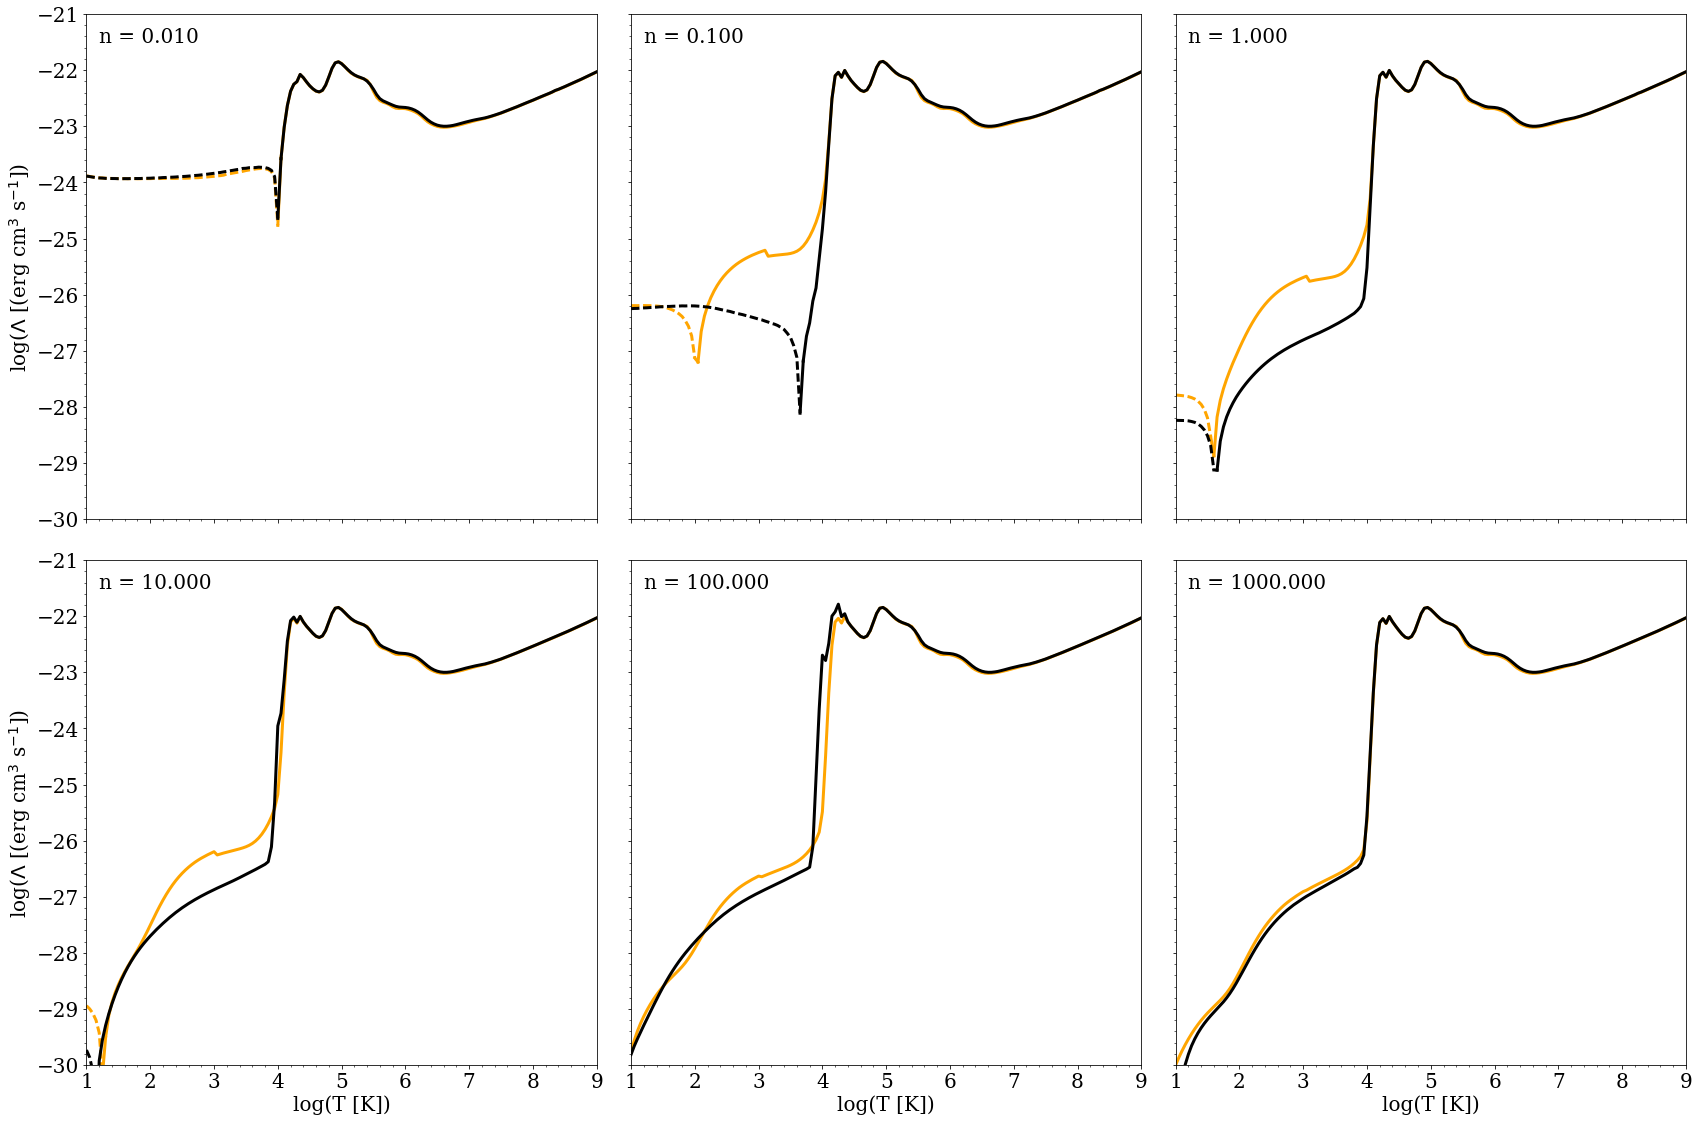

In [54]:

#Z = 

plot_n = [-2, -1, 0, 1, 2, 3]
Z = 0.1

fig, ax = plt.subplots(2,3, sharex=True, sharey=True)
print Z

axis_tuple = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
z = 0.0
z_index = None

def _plot_data(ax, x, y, color, label):
    if np.size(y[y<0]) > 0:

        ax.plot(x[y<0], np.log10(np.abs(y[y<0])), lw = 3, color = color, ls = '--')
        ax.plot(x[y>0], np.log10(np.abs(y[y>0])), lw = 3, color = color, ls = '-', label = label)
    
        # fill in the gaps between the two regions if there are any - don't attempt if there are multiple
        test = np.where(y<0)[0]
        if all( test[1:] == (test[:-1] + 1)):
            heat_max_index = np.argmax(y[y<0])
            cool_min_index = np.argmin(y[y>0]) + np.size(y[y<0]) + 1
            ax.plot(x[heat_max_index:cool_min_index], np.log10(np.abs(y[heat_max_index:cool_min_index])), 
                    lw = 3, color = color, ls = '-')  
        else:
            print 'cannot plot the separate lines'
    else:
        ax.plot(x, np.log10(np.abs(y)), lw = 3, color = color, ls = '-', label = label)
        
        
        
    return
    
    
for i in [0,1,2,3,4,5]:
    
    n = plot_n[i]
    
    #index1 = np.argmin(np.abs(all_n - n))
    
    #index2 = 0  
    index1, index2, run_num = get_index_number(n, z = z, z_index = z_index)
    
    #
    # Plot Forbes et al. type cooling
    # this should be shielded primordial + optically thin metal
    #
    total_cool = thin_metal_c[index1][index2] * Z + shield_primordial_c[index1][index2]
    total_heat = thin_metal_h[index1][index2] * Z + shield_primordial_h[index1][index2]
    net = total_cool - total_heat
    
    i = axis_tuple[i]
    _plot_data(ax[i], T, net, 'orange', 'Inconsistent Model')
    
    #ax[i].plot(T[net<0], np.log10(np.abs(net[net<0])), lw = 3, color = 'orange', ls = '--')
    #ax[i].plot(T[net>0], np.log10(np.abs(net[net>0])), lw = 3, color = 'orange', ls = '-', label = 'Inconsistent Model')
    
    total_cool = shield_metal_c[index1][index2] * Z + shield_primordial_c[index1][index2]
    total_heat = shield_metal_h[index1][index2] * Z + shield_primordial_h[index1][index2]
    net = total_cool - total_heat    
    
    _plot_data(ax[i], T, net, 'black', 'Consistent Metal Cooling Rates')
        
    #ax[i].plot(T[net<0], np.log10(np.abs(net[net<0])), lw = 3, color = 'black', ls = '--')
    #ax[i].plot(T[net>0], np.log10(np.abs(net[net>0])), lw = 3, color = 'black', ls = '-', label = 'Metal Consistent Model')
        
    if i == 0:
        ax[i].legend(loc='best')
    
    # ax[i].set_title(r'n = %.3f   -    Z = %0.2f Z$_{\odot}$'%(10**n,Z))
    x_ann = 1.2
    y_ann = -21.5
    ax[i].annotate(r'n = %.3f'%(10**n), xy=(x_ann,y_ann),xytext=(x_ann,y_ann))

    ax[i].xaxis.set_ticks(np.arange(1,9.1,1))
    
    ax[i].set_xlim(1,9)
    ax[i].set_ylim(-30, -21)

xlabel = r'log(T [K])'
ax[(1,0)].set_xlabel(xlabel)
ax[(1,1)].set_xlabel(xlabel)
ax[(1,2)].set_xlabel(xlabel)
ylabel = r'log($\Lambda$ [(erg cm$^{3}$ s$^{-1}$])'
ax[(0,0)].set_ylabel(ylabel)
ax[(1,0)].set_ylabel(ylabel)

plt.minorticks_on()
fig.set_size_inches(24,16)
plt.tight_layout()
plt.show()

fig.savefig('cooling_model_comparison')